In [31]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

import seaborn as sns

In [65]:
dataset_csv_path = Path('data/news/20newsgroup_preprocessed.csv')

dataset_csv_path.is_file()

True

In [67]:
df = pd.read_csv(dataset_csv_path, delimiter=';')

## EDA

In [68]:
df.head()

,target,text,text_cleaned
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,atheist resources addresses atheist organizati...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,begin pgp signed message introduction atheism ...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,article charley wingate writes well john quite...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...,kings become philosophers philosophers become ...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,article bob mcgwier writes however hate econom...


In [69]:
df.columns

Index(['target', 'text', 'text_cleaned'], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18828 entries, 0 to 18827
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        18828 non-null  object
 1   text          18828 non-null  object
 2   text_cleaned  18792 non-null  object
dtypes: object(3)
memory usage: 441.4+ KB


In [71]:
text_column = 'text_cleaned'
label_column = 'target'

<AxesSubplot:xlabel='target', ylabel='Count'>

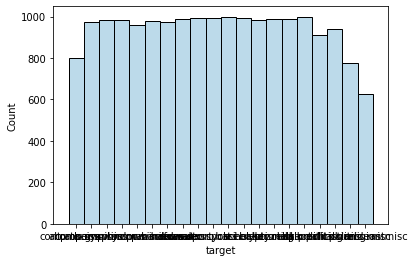

In [75]:
sns.histplot(df[label_column])#.value_counts().plot(kind='bar');

## Split datasets

Lengths:   dataset_type  lengths
0        train    13179
1          val     2824
2         test     2825


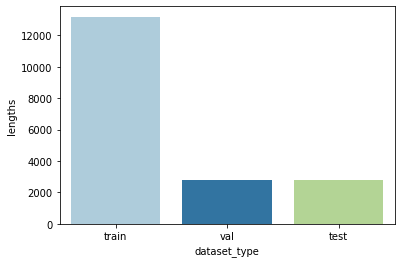

In [74]:
X_train, X_test = train_test_split(
    df,
    test_size=0.3,
    shuffle=True
)

X_val, X_test = train_test_split(
    X_test,
    test_size=0.5,
    shuffle=True
)


lengths_df = pd.DataFrame.from_dict({
    'train': [len(X_train)],
    'val': [len(X_val)],
    'test': [len(X_test)]
})
lengths_df = lengths_df.transpose().reset_index()
lengths_df.columns = ['dataset_type', 'lengths']

print(f'Lengths: {lengths_df}')

sns.barplot(x='dataset_type', y='lengths', data=lengths_df);

In [77]:
X_train[label_column].unique()

array(['soc.religion.christian', 'comp.graphics', 'sci.electronics',
       'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism',
       'comp.windows.x', 'rec.motorcycles', 'comp.sys.ibm.pc.hardware',
       'misc.forsale', 'talk.politics.guns', 'comp.sys.mac.hardware',
       'sci.space', 'rec.autos', 'sci.med', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'sci.crypt', 'talk.politics.mideast',
       'talk.religion.misc'], dtype=object)

In [86]:
type(f

matplotlib.figure.Figure

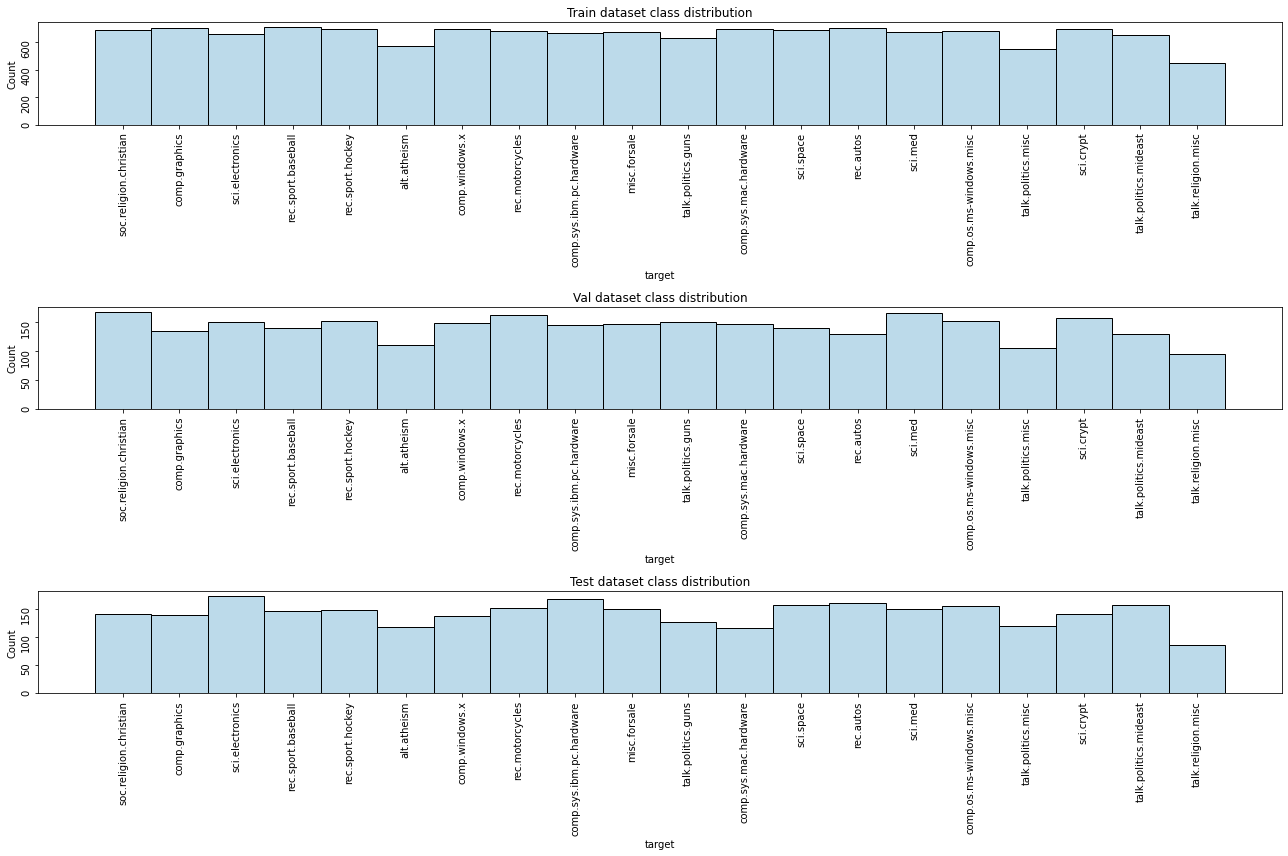

In [92]:
import matplotlib.pyplot as plt

unique_values = X_train[label_column].unique()

X_train[label_column] = pd.Categorical(X_train[label_column], unique_values)
X_val[label_column] = pd.Categorical(X_val[label_column], unique_values)
X_test[label_column] = pd.Categorical(X_test[label_column], unique_values)

sns.set_palette("Paired")
f, axs = plt.subplots(3, 1, figsize=(18, 12), gridspec_kw=dict(height_ratios=[6, 6, 6]))
sns.histplot(data=X_train[label_column], ax=axs[0])
axs[0].set_title('Train dataset class distribution')
sns.histplot(data=X_val[label_column], ax=axs[1])
axs[1].set_title('Val dataset class distribution')
sns.histplot(data=X_test[label_column], ax=axs[2])
axs[2].set_title('Test dataset class distribution')

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)


f.tight_layout()


# X_train['airline_sentiment'].value_counts().plot(kind='bar');

In [93]:
X_train = X_train[[label_column, text_column]].reset_index(drop=True)
X_val = X_val[[label_column, text_column]].reset_index(drop=True)
X_test = X_test[[label_column, text_column]].reset_index(drop=True)

save_path = dataset_csv_path.parent


X_train.to_csv(save_path /'train.csv', header=True, index=False)
X_val.to_csv(save_path / 'val.csv', header=True, index=False)
X_test.to_csv(save_path / 'test.csv', header=True, index=False)

In [80]:
X_test

,target,text_cleaned
0,sci.electronics,im looking circuit flash led response output w...
1,sci.electronics,article writes got ibmpc xt documents true ibm...
2,comp.sys.mac.hardware,regarding post information mac portable powerb...
3,talk.politics.misc,clayton cramer writes article greg hennessy wr...
4,sci.electronics,scielectronics robert g carpenter writes im wo...
...,...,...
2820,sci.electronics,article writes might add collecting last years...
2821,talk.politics.misc,writes robert nehls writes jason k schechner w...
2822,misc.forsale,selling att xt compatible comes green screen c...
2823,sci.electronics,anybody send pinouts real time clock ic oki se...
